In [1]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

DATA_PATH3 = os.getenv("DATA_PATH3")
DATA_PATH4 = os.getenv("DATA_PATH4")
MERGE_PATH = os.getenv("MERGE_PATH")

In [2]:
df1 = pd.read_csv(DATA_PATH3)
df1.head()

,year,title,published_at,updated_at,category,nominee,artist,workers
0,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi..."
1,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,"Hey, Ma",Bon Iver,"BJ Burton, Brad Cook, Chris Messina & Justin V..."
2,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,7 rings,Ariana Grande,"Charles Anderson, Tommy Brown, Michael Foster ..."
3,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Hard Place,H.E.R.,"Rodney “Darkchild” Jerkins, producer; Joseph H..."
4,2019,62nd Annual GRAMMY Awards (2019),2020-05-19 12:10:28+00:00,2020-05-19 12:10:28+00:00,Record Of The Year,Talk,Khalid,"Disclosure & Denis Kosiak, producers; Ingmar C..."


In [3]:
df2 = pd.read_csv(DATA_PATH4)
df2.head()

,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [4]:
merged_df = pd.merge(df1, df2, left_on='artist', right_on='artists' , how='inner')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25691 entries, 0 to 25690
Data columns (total 27 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              25691 non-null  int64  
 1   title             25691 non-null  object 
 2   published_at      25691 non-null  object 
 3   updated_at        25691 non-null  object 
 4   category          25691 non-null  object 
 5   nominee           25691 non-null  object 
 6   artist            25691 non-null  object 
 7   workers           25691 non-null  object 
 8   artists           25691 non-null  object 
 9   album_name        25691 non-null  object 
 10  track_name        25691 non-null  object 
 11  popularity        25691 non-null  int64  
 12  duration_ms       25691 non-null  int64  
 13  explicit          25691 non-null  bool   
 14  danceability      25691 non-null  float64
 15  energy            25691 non-null  float64
 16  key               25691 non-null  int64 

In [5]:
to_eliminate = ['artists', 'updated_at', 'published_at']
merged_df = merged_df.drop(columns=to_eliminate)
merged_df.head()

,year,title,category,nominee,artist,workers,album_name,track_name,popularity,duration_ms,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...","WHEN WE ALL FALL ASLEEP, WHERE DO WE GO?",bad guy,84,194087,...,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,4,electro
1,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",Halloween & Chill,Lost Cause,0,212496,...,-8.494,0,0.2410,0.705,0.00751,0.0577,0.518,75.051,4,electro
2,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",pov: it's 2021,Therefore I Am,2,174321,...,-7.773,0,0.0697,0.218,0.13000,0.0550,0.716,94.009,4,electro
3,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",Отново на училище,bad guy,1,194087,...,-10.965,1,0.3750,0.328,0.13000,0.1000,0.562,135.128,4,electro
4,2019,62nd Annual GRAMMY Awards (2019),Record Of The Year,Bad Guy,Billie Eilish,"Finneas O'Connell, producer; Rob Kinelski & Fi...",Halloween Songs | Witches Hour,bury a friend,5,193143,...,-14.505,1,0.3490,0.739,0.14300,0.1060,0.205,120.035,4,electro


In [6]:
for i in merged_df.columns:
    if merged_df[i].dtype == 'object':
        merged_df[i] = merged_df[i].astype('string')

merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25691 entries, 0 to 25690
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   year              25691 non-null  int64  
 1   title             25691 non-null  string 
 2   category          25691 non-null  string 
 3   nominee           25691 non-null  string 
 4   artist            25691 non-null  string 
 5   workers           25691 non-null  string 
 6   album_name        25691 non-null  string 
 7   track_name        25691 non-null  string 
 8   popularity        25691 non-null  int64  
 9   duration_ms       25691 non-null  int64  
 10  explicit          25691 non-null  bool   
 11  danceability      25691 non-null  float64
 12  energy            25691 non-null  float64
 13  key               25691 non-null  int64  
 14  loudness          25691 non-null  float64
 15  mode              25691 non-null  int64  
 16  speechiness       25691 non-null  float6

In [7]:
merged_df.describe()

,year,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,25691.000000,25691.000000,2.569100e+04,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000,25691.000000
mean,1992.781986,27.289051,1.993077e+05,0.539807,0.555862,5.250633,-8.723251,0.726169,0.056299,0.429510,0.038959,0.182086,0.557148,115.610221,3.903118
std,18.290325,31.253066,8.992902e+04,0.136341,0.219391,3.444772,3.440691,0.445932,0.057070,0.327156,0.146353,0.155619,0.241137,29.400398,0.360995
min,1958.000000,0.000000,0.000000e+00,0.000000,0.001360,0.000000,-32.893000,0.000000,0.000000,0.000001,0.000000,0.021700,0.000000,0.000000,0.000000
25%,1976.000000,0.000000,1.555600e+05,0.456000,0.377000,2.000000,-10.577000,0.000000,0.032300,0.098200,0.000000,0.088100,0.348000,91.959000,4.000000
50%,1996.000000,2.000000,1.922660e+05,0.538000,0.566000,5.000000,-8.339000,1.000000,0.042200,0.442000,0.000006,0.121000,0.609000,114.590000,4.000000
75%,2008.000000,61.000000,2.448260e+05,0.616000,0.719000,8.000000,-6.238000,1.000000,0.060500,0.733000,0.003160,0.251000,0.746000,138.391000,4.000000
max,2019.000000,97.000000,1.412451e+06,0.951000,0.997000,11.000000,-0.223000,1.000000,0.965000,0.996000,0.986000,0.997000,0.983000,210.789000,5.000000


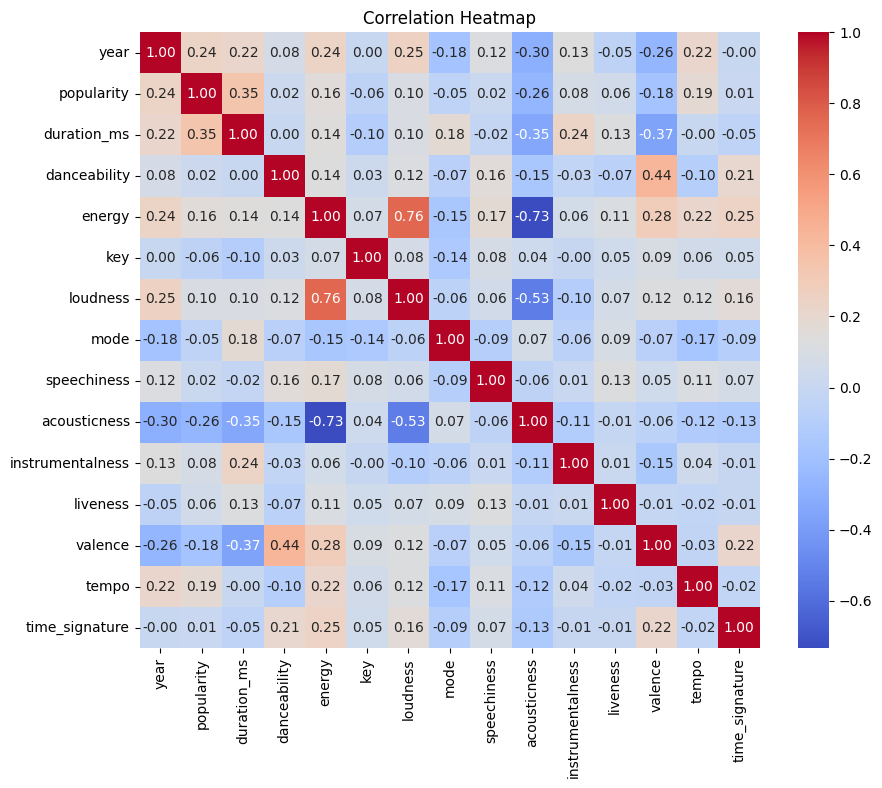

In [8]:
num_data = merged_df.select_dtypes(include=['float64', 'int64'])
correlation = num_data.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

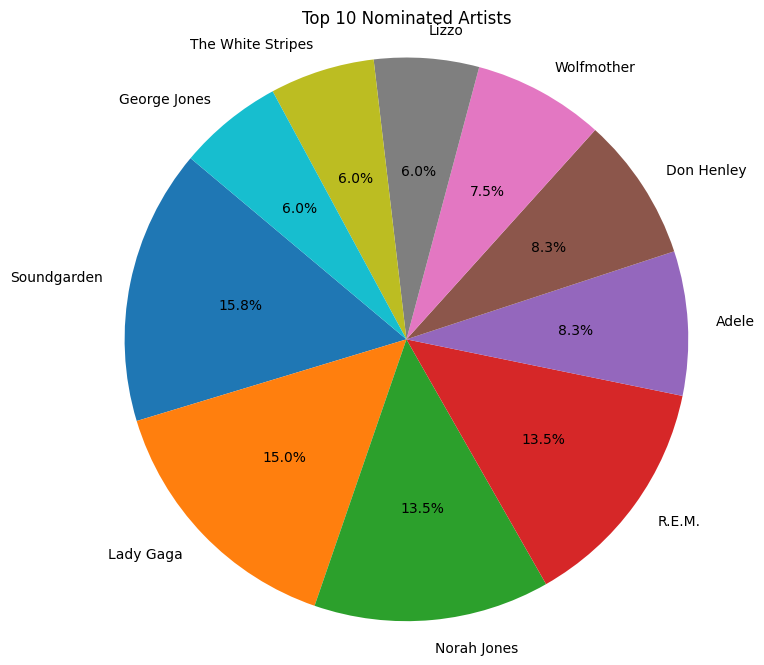

In [9]:
def pie_chart_top10_nominee_track(merged_df):
    artist_award_counts = {}

    for index, row in merged_df.iterrows():
        nominee = row['nominee']
        track_name = row['track_name']
        artist = row['artist']
        
        if nominee == track_name:
            if artist in artist_award_counts:
                artist_award_counts[artist] += 1
            else:
                artist_award_counts[artist] = 1
    
    sorted_artists = sorted(artist_award_counts, key=artist_award_counts.get, reverse=True)
    top10_artists = sorted_artists[:10]
    awards = [artist_award_counts[artist] for artist in top10_artists]
    
    # Creamos el gráfico de pastel
    plt.figure(figsize=(8, 8))
    plt.pie(awards, labels=top10_artists, autopct='%1.1f%%', startangle=140)
    plt.title('Top 10 Nominated Artists')
    plt.axis('equal')
    plt.show()

pie_chart_top10_nominee_track(merged_df)


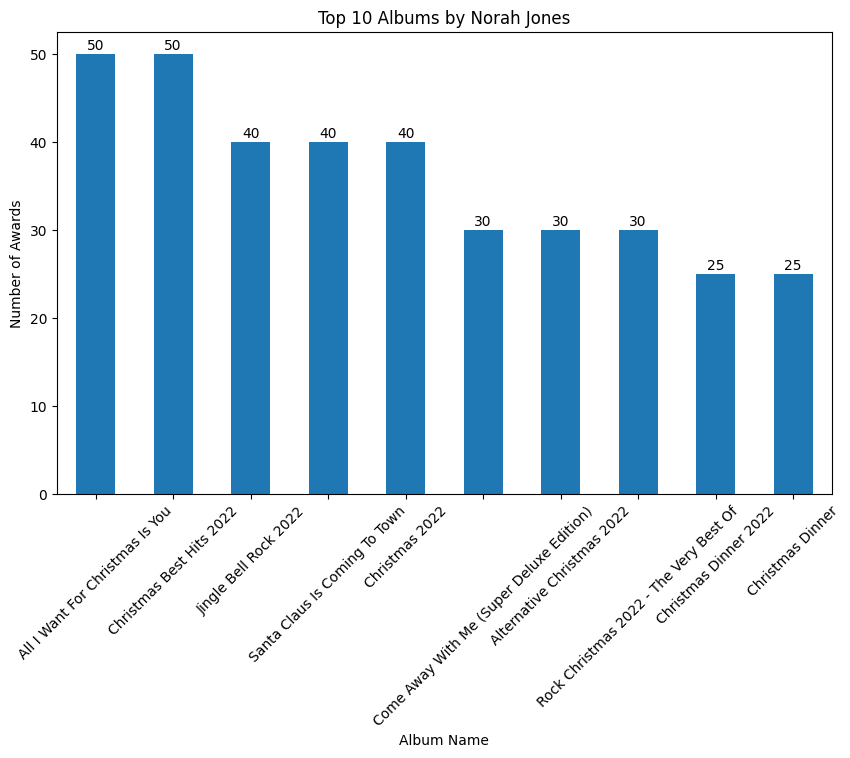

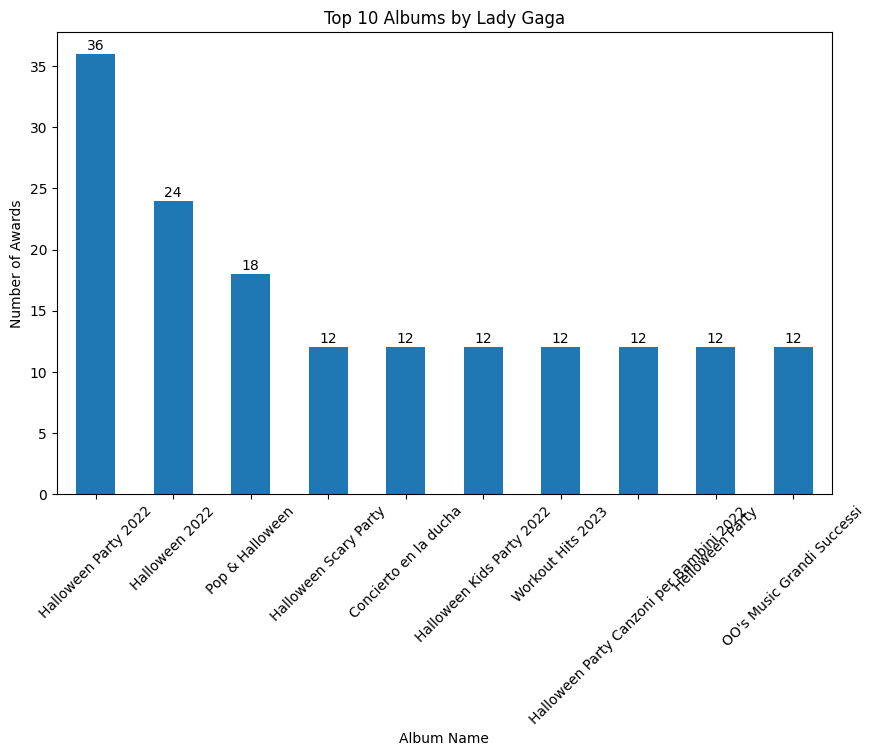

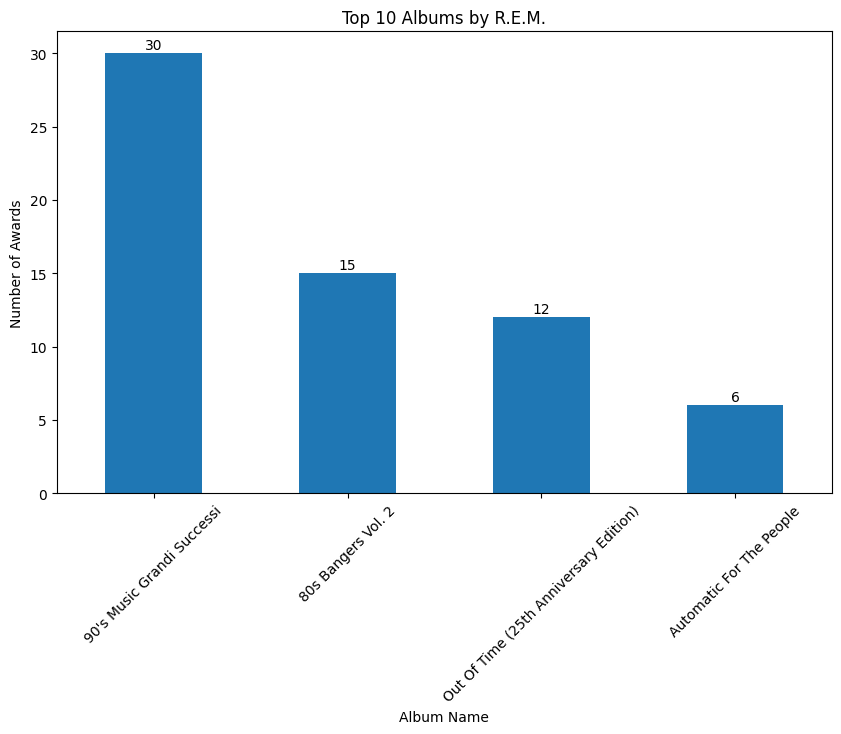

In [10]:
top_artist = ['Soundgarden', 'Lady Gaga', 'Norah Jones', 'R.E.M.']

def top_albums_by_artists(merged_df):
    artist_nominee_counts = {}
    
    for artist in merged_df['artist']:
        if artist in top_artist:
            if artist in artist_nominee_counts:
                artist_nominee_counts[artist] += 1
            else:
                artist_nominee_counts[artist] = 1
    
    sorted_artists = sorted(artist_nominee_counts, key=artist_nominee_counts.get, reverse=True)
    
    for artist in sorted_artists[:3]:
        artist_df = merged_df[merged_df['artist'] == artist]      
        top_albums = artist_df['album_name'].value_counts().head(10)
        
        plt.figure(figsize=(10, 6))
        top_albums.plot(kind='bar')
        plt.title(f'Top 10 Albums by {artist}')
        plt.xlabel('Album Name')
        plt.ylabel('Number of Awards')
        plt.xticks(rotation=45)
        for i, value in enumerate(top_albums.values):
            plt.text(i, value + 0.1, str(value), ha='center', va='bottom')
        plt.show()

top_albums_by_artists(merged_df)

In [11]:
def average_metrics_for_top_artists(merged_df, top_artist):
    filtered_df = merged_df[merged_df['artist'].isin(top_artist)]
    average_metrics = filtered_df.groupby('artist')[merged_df.columns[10:23]].mean()
    return average_metrics

average_metrics_df = average_metrics_for_top_artists(merged_df, top_artist)
average_metrics_df.head()


,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
artist,,,,,,,,,,,,,
Lady Gaga,0.261905,0.718619,0.802381,6.238095,-4.715952,0.571429,0.059024,0.052510,0.000313,0.242579,0.635929,117.271524,4.000000
Norah Jones,0.000000,0.486120,0.322552,4.686667,-10.721493,0.986667,0.037398,0.695513,0.036680,0.126011,0.288733,114.279067,3.773333
R.E.M.,0.000000,0.511333,0.822762,7.380952,-7.273381,0.571429,0.032690,0.147571,0.002362,0.065467,0.739476,160.696333,3.904762
Soundgarden,0.000000,0.363828,0.823931,4.793103,-5.838241,0.862069,0.040938,0.000481,0.058904,0.150583,0.355793,122.212207,3.758621


In [12]:
merged_df.to_csv(MERGE_PATH, index=False)